In [8]:
import pymc3 as pm
import seaborn as sns
import numpy as np

In [1]:


iris = sns.load_dataset("iris")

x_n = iris.columns[:-1]
x_2 = iris[x_n].values
X = (x_2 - x_2.mean(axis=0))/x_2.std(axis=0)

data_classes = list(iris['species'].unique())
y = iris['species'].apply(data_classes.index)


with pm.Model() as modelo_s:

    alpha = pm.Normal('alpha', mu=0, sd=10, shape=3)
    beta = pm.Normal('beta', mu=0, sd=10, shape=(4,3))

    mu = alpha + pm.math.dot(X, beta)
    p = pm.math.exp(mu)/pm.math.sum(pm.math.exp(mu), axis=0)

    yl = pm.Categorical('yl', p=p, observed=y)

    trace_s = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:43<00:00, 138.22draws/s]
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f982cf4bef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f982ceaedd8>]], dtype=object)

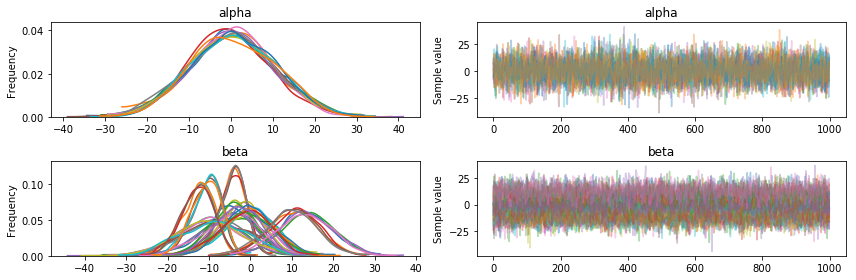

In [2]:
pm.traceplot(trace_s)

In [3]:
ppc = pm.sample_ppc(trace_s,
                    model=modelo_s,
                    samples=1000)

/home/louis/anaconda3/envs/env_UncertaintyForecasting/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1000/1000 [00:28<00:00, 50.17it/s]


In [11]:
predictions = list()
for index in range(y.shape[0]):
    counts = np.bincount(list(ppc.items())[0][1].T[index])
    label = np.argmax(counts)
    predictions.append(label)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.97999999999999998